In [260]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv('/Users/data/VsCodeProjects/DataScience/data/raw/eurusd_hour.csv')
df.head(5)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93084 entries, 0 to 93083
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    93084 non-null  object 
 1   Time    93084 non-null  object 
 2   BO      93084 non-null  float64
 3   BH      93084 non-null  float64
 4   BL      93084 non-null  float64
 5   BC      93084 non-null  float64
 6   BCh     93084 non-null  float64
 7   AO      93084 non-null  float64
 8   AH      93084 non-null  float64
 9   AL      93084 non-null  float64
 10  AC      93084 non-null  float64
 11  ACh     93084 non-null  float64
dtypes: float64(10), object(2)
memory usage: 8.5+ MB


In [4]:
from datetime import datetime, date, time

#перевод с строки даты в дату общего формата
def str_to_datetime(s: str):
    splited = s.split('-')
    year, month, day = int(splited[0]), int(splited[1]), int(splited[2])
    return datetime.datetime(year=year, month=month, day=day)




Изменение формата времени к объекту datetime

In [5]:
def str_hours_to_datetime(t: str):
    splited = t.split(':')
    hour, minute = int(splited[0]), int(splited[1])
    return datetime.time(hour=hour, minute=minute)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93084 entries, 0 to 93083
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    93084 non-null  object 
 1   Time    93084 non-null  object 
 2   BO      93084 non-null  float64
 3   BH      93084 non-null  float64
 4   BL      93084 non-null  float64
 5   BC      93084 non-null  float64
 6   BCh     93084 non-null  float64
 7   AO      93084 non-null  float64
 8   AH      93084 non-null  float64
 9   AL      93084 non-null  float64
 10  AC      93084 non-null  float64
 11  ACh     93084 non-null  float64
dtypes: float64(10), object(2)
memory usage: 8.5+ MB


In [6]:
df['Date'] = pd.to_datetime(df['Date']).dt.date
df['Time'] = pd.to_datetime(df['Time']).dt.time

/var/folders/9c/vk6dn3k90g9cy2bswv5c6kk00000gn/T/ipykernel_61727/4204116191.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time']).dt.time


In [7]:
df['Datetime'] = df.apply(lambda row: datetime.combine(date=row['Date'], time=row['Time']), axis=1)

In [8]:
df.BO.describe()

count    93084.000000
mean         1.265734
std          0.126894
min          1.035530
25%          1.139878
50%          1.274100
75%          1.357615
max          1.601310
Name: BO, dtype: float64

In [87]:
df.BC.describe()

count    93084.000000
mean         1.265733
std          0.126892
min          1.035550
25%          1.139880
50%          1.274105
75%          1.357630
max          1.601390
Name: BC, dtype: float64

In [88]:
import matplotlib.pyplot as plt

<Axes: >

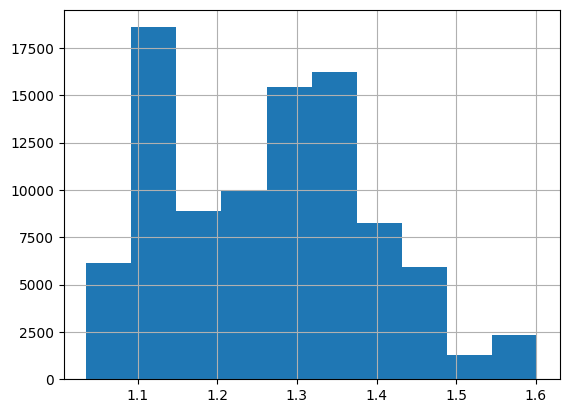

In [89]:
df.BC.hist()

<Axes: >

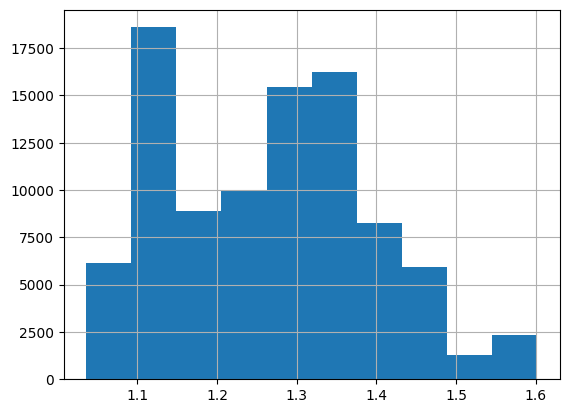

In [90]:
df.AC.hist()

In [123]:
df['Datetime']

KeyError: 'Datetime'

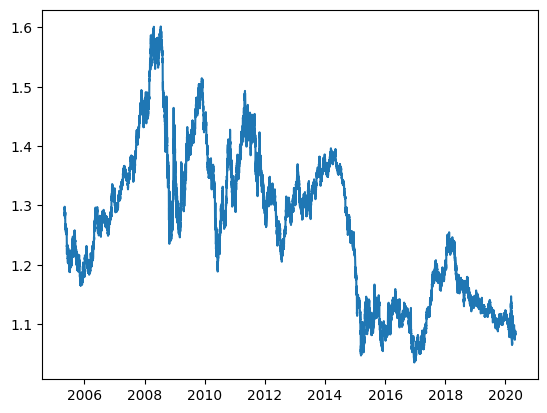

In [113]:
plt.plot(df['Datetime'], df['BC'])


In [9]:
df.index = pd.to_datetime(df['Datetime'])
df = df.drop(columns=['Datetime'])

In [10]:
df.columns

Index(['Date', 'Time', 'BO', 'BH', 'BL', 'BC', 'BCh', 'AO', 'AH', 'AL', 'AC',
       'ACh'],
      dtype='object')

In [11]:
df = df.drop(columns=['Date'])

In [12]:
df = df.drop(columns=['Time'])

In [43]:
df

,BO,BH,BL,BC,BCh,AO,AH,AL,AC,ACh
Datetime,,,,,,,,,,
2005-05-02 00:00:00,1.28520,1.28520,1.28400,1.28440,-0.00080,1.28540,1.28540,1.28420,1.28460,-0.00080
2005-05-02 01:00:00,1.28440,1.28480,1.28390,1.28420,-0.00020,1.28460,1.28500,1.28410,1.28440,-0.00020
2005-05-02 02:00:00,1.28430,1.28540,1.28410,1.28510,0.00080,1.28450,1.28560,1.28430,1.28530,0.00080
2005-05-02 03:00:00,1.28510,1.28590,1.28500,1.28510,0.00000,1.28530,1.28610,1.28520,1.28530,0.00000
2005-05-02 04:00:00,1.28520,1.28590,1.28490,1.28550,0.00030,1.28540,1.28610,1.28510,1.28570,0.00030
...,...,...,...,...,...,...,...,...,...,...
2020-04-29 18:00:00,1.08620,1.08851,1.08611,1.08713,0.00093,1.08660,1.08865,1.08640,1.08726,0.00066
2020-04-29 19:00:00,1.08711,1.08823,1.08659,1.08748,0.00037,1.08725,1.08837,1.08675,1.08760,0.00035
2020-04-29 20:00:00,1.08747,1.08788,1.08691,1.08708,-0.00039,1.08758,1.08810,1.08706,1.08808,0.00050


In [45]:
df.describe()

,BO,BH,BL,BC,BCh,AO,AH,AL,AC,ACh
count,93084.000000,93084.000000,93084.000000,93084.000000,9.308400e+04,93084.000000,93084.000000,93084.000000,93084.000000,93084.000000
mean,1.265734,1.266755,1.264736,1.265733,-8.928495e-07,1.265900,1.266917,1.264897,1.265899,-0.000001
std,0.126894,0.127060,0.126722,0.126892,1.544143e-03,0.126891,0.127053,0.126715,0.126891,0.001546
min,1.035530,1.036970,1.033950,1.035550,-2.505000e-02,1.035660,1.037100,1.034090,1.035680,-0.024950
25%,1.139878,1.140728,1.139130,1.139880,-6.000000e-04,1.140050,1.140890,1.139300,1.140048,-0.000590
50%,1.274100,1.275315,1.272955,1.274105,1.000000e-05,1.274280,1.275490,1.273150,1.274290,0.000000
75%,1.357615,1.358770,1.356533,1.357630,6.000000e-04,1.357770,1.358920,1.356673,1.357770,0.000600
max,1.601310,1.603840,1.599200,1.601390,3.022000e-02,1.601400,1.603930,1.599290,1.601480,0.030430


In [51]:
df['price'] = df[['BO', 'AO']].mean(axis=1)

In [ ]:
df.pop('AO')

Datetime
2005-05-02 00:00:00    1.28540
2005-05-02 01:00:00    1.28460
2005-05-02 02:00:00    1.28450
2005-05-02 03:00:00    1.28530
2005-05-02 04:00:00    1.28540
                        ...   
2020-04-29 18:00:00    1.08660
2020-04-29 19:00:00    1.08725
2020-04-29 20:00:00    1.08758
2020-04-29 21:00:00    1.08808
2020-04-29 22:00:00    1.08756
Name: AO, Length: 93084, dtype: float64

In [56]:
df.pop('BO')

Datetime
2005-05-02 00:00:00    1.28520
2005-05-02 01:00:00    1.28440
2005-05-02 02:00:00    1.28430
2005-05-02 03:00:00    1.28510
2005-05-02 04:00:00    1.28520
                        ...   
2020-04-29 18:00:00    1.08620
2020-04-29 19:00:00    1.08711
2020-04-29 20:00:00    1.08747
2020-04-29 21:00:00    1.08708
2020-04-29 22:00:00    1.08728
Name: BO, Length: 93084, dtype: float64

In [ ]:
df['Highest'] = df[['BH', 'AH']].mean(axis=1)
df['Lowest'] = df[['BL', 'AL']].mean(axis=1)

In [59]:
df.pop('BH')
df.pop('AH')
df.pop('AL')
df.pop('BL')

Datetime
2005-05-02 00:00:00    1.28400
2005-05-02 01:00:00    1.28390
2005-05-02 02:00:00    1.28410
2005-05-02 03:00:00    1.28500
2005-05-02 04:00:00    1.28490
                        ...   
2020-04-29 18:00:00    1.08611
2020-04-29 19:00:00    1.08659
2020-04-29 20:00:00    1.08691
2020-04-29 21:00:00    1.08699
2020-04-29 22:00:00    1.08727
Name: BL, Length: 93084, dtype: float64

In [60]:
df

,BC,BCh,AC,ACh,price,Highest,Lowest
Datetime,,,,,,,
2005-05-02 00:00:00,1.28440,-0.00080,1.28460,-0.00080,1.285300,1.285300,1.284100
2005-05-02 01:00:00,1.28420,-0.00020,1.28440,-0.00020,1.284500,1.284900,1.284000
2005-05-02 02:00:00,1.28510,0.00080,1.28530,0.00080,1.284400,1.285500,1.284200
2005-05-02 03:00:00,1.28510,0.00000,1.28530,0.00000,1.285200,1.286000,1.285100
2005-05-02 04:00:00,1.28550,0.00030,1.28570,0.00030,1.285300,1.286000,1.285000
...,...,...,...,...,...,...,...
2020-04-29 18:00:00,1.08713,0.00093,1.08726,0.00066,1.086400,1.088580,1.086255
2020-04-29 19:00:00,1.08748,0.00037,1.08760,0.00035,1.087180,1.088300,1.086670
2020-04-29 20:00:00,1.08708,-0.00039,1.08808,0.00050,1.087525,1.087990,1.086985


Datetime
2005-05-02 00:00:00   -0.00080
2005-05-02 01:00:00   -0.00020
2005-05-02 02:00:00    0.00080
2005-05-02 03:00:00    0.00000
2005-05-02 04:00:00    0.00030
                        ...   
2020-04-29 18:00:00    0.00093
2020-04-29 19:00:00    0.00037
2020-04-29 20:00:00   -0.00039
2020-04-29 21:00:00    0.00006
2020-04-29 22:00:00    0.00015
Name: BCh, Length: 93084, dtype: float64

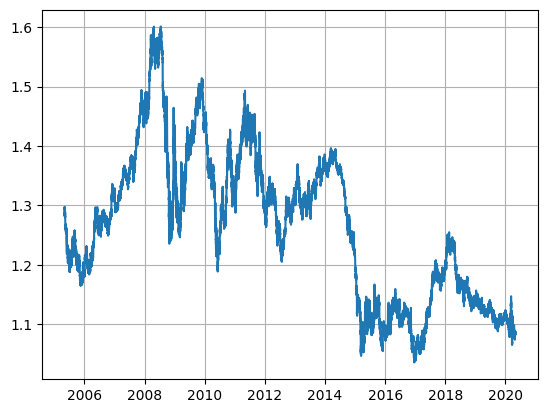

In [65]:
plt.plot(df.index, df['price'])
plt.grid()
df.pop('ACh')
df.pop('BCh')

In [67]:
df.pop('BC')
df.pop('AC')

Datetime
2005-05-02 00:00:00    1.28460
2005-05-02 01:00:00    1.28440
2005-05-02 02:00:00    1.28530
2005-05-02 03:00:00    1.28530
2005-05-02 04:00:00    1.28570
                        ...   
2020-04-29 18:00:00    1.08726
2020-04-29 19:00:00    1.08760
2020-04-29 20:00:00    1.08808
2020-04-29 21:00:00    1.08766
2020-04-29 22:00:00    1.08760
Name: AC, Length: 93084, dtype: float64

In [68]:
df

,price,Highest,Lowest
Datetime,,,
2005-05-02 00:00:00,1.285300,1.285300,1.284100
2005-05-02 01:00:00,1.284500,1.284900,1.284000
2005-05-02 02:00:00,1.284400,1.285500,1.284200
2005-05-02 03:00:00,1.285200,1.286000,1.285100
2005-05-02 04:00:00,1.285300,1.286000,1.285000
...,...,...,...
2020-04-29 18:00:00,1.086400,1.088580,1.086255
2020-04-29 19:00:00,1.087180,1.088300,1.086670
2020-04-29 20:00:00,1.087525,1.087990,1.086985


In [266]:
features = ['price', 'Highest', 'Lowest']
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df.values)

In [267]:
X = df[features]

In [268]:
y = df['price'].shift(1)

In [95]:
X


,price,Highest,Lowest
Datetime,,,
2005-05-02 00:00:00,1.285300,1.285300,1.284100
2005-05-02 01:00:00,1.284500,1.284900,1.284000
2005-05-02 02:00:00,1.284400,1.285500,1.284200
2005-05-02 03:00:00,1.285200,1.286000,1.285100
2005-05-02 04:00:00,1.285300,1.286000,1.285000
...,...,...,...
2020-04-29 18:00:00,1.086400,1.088580,1.086255
2020-04-29 19:00:00,1.087180,1.088300,1.086670
2020-04-29 20:00:00,1.087525,1.087990,1.086985


In [93]:
y[-1]

/var/folders/9c/vk6dn3k90g9cy2bswv5c6kk00000gn/T/ipykernel_61727/3767466381.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y[-1]


np.float64(1.08758)

In [269]:
y = df['price'].shift(-1)  # чтобы прогнозировать следующую цену
X = df[features].iloc[:-1]  # убираем последнюю строку
y = y.iloc[:-1]    

In [99]:
y.iloc[-3:-1]

Datetime
2020-04-29 20:00:00    1.087180
2020-04-29 21:00:00    1.087525
Name: price, dtype: float64

In [270]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, shuffle=False)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test  = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [271]:
model = Sequential([
    LSTM(48, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    Dense(64, activation='elu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mae')
model.fit(X_train, y_train, epochs=100, batch_size=60)

Epoch 1/100


/Users/data/VsCodeProjects/DataScience/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


466/466 ━━━━━━━━━━━━━━━━━━━━ 1s 502us/step - loss: 0.1010
Epoch 2/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - loss: 0.0397
Epoch 3/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - loss: 0.0129
Epoch 4/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - loss: 0.0092
Epoch 5/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - loss: 0.0087
Epoch 6/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - loss: 0.0081
Epoch 7/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - loss: 0.0080
Epoch 8/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - loss: 0.0070
Epoch 9/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - loss: 0.0077
Epoch 10/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - loss: 0.0071
Epoch 11/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - loss: 0.0068
Epoch 12/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - loss: 0.0069
Epoch 13/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - loss: 0.0069
Epoch 14/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - loss: 0.0069
Epoch 15/100
466/466 ━━━━━━

In [272]:
X_pred = model.predict(X_test)

2037/2037 ━━━━━━━━━━━━━━━━━━━━ 1s 217us/step


In [254]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mean_squared_error(y_test, X_pred)

3.243658836184506e-06

In [281]:
x_example = X_pred[0:3]  # (1, timesteps, features)
y_true = y_test[1]
y_true

/var/folders/9c/vk6dn3k90g9cy2bswv5c6kk00000gn/T/ipykernel_61727/312228033.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_true = y_test[1]


np.float64(1.503825)

In [255]:
y_pred = model.predict(x_example)
print("Прогноз модели:", y_pred[0][0])
print("Реальное значение:", y_true)
print('Погрешность', 100 - y_pred[0][0]/y_true * 100,'%')
print(mean_absolute_error(y_test, X_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Прогноз модели: 1.1649953
Реальное значение: 1.1644
Погрешность -0.051132202 %
0.001468556228050142


In [258]:
x_example = np.array([[[1.1663, 1.16718, 1.16586]]])  # (1, timesteps, features)
y_true = np.float32(1.16538)

In [259]:
y_pred = model.predict(x_example)
print("Прогноз модели:", y_pred[0][0])
print("Реальное значение:", y_true)
print('Погрешность', 100 - y_pred[0][0]/y_true * 100,'%')
#epoches=100, batch_size = 60

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Прогноз модели: 1.1669397
Реальное значение: 1.16538
Погрешность -0.13383484 %
